# Data and data split

In [22]:
from sklearn.model_selection import train_test_split
import kagglehub
import pandas as pd

path = kagglehub.dataset_download("sajidsaifi/prostate-cancer")
print(path)

dataset = pd.read_csv(path + "/Prostate_Cancer.csv")

Y = dataset['diagnosis_result']
X = dataset.drop('diagnosis_result', axis = 1)
Y = pd.DataFrame({'is Beaning':[1 if d == 'B' else 0 for d in Y ]})

x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2,stratify=Y ,random_state=42)

pd.concat([x_train, y_train], axis=1)

/home/franio/.cache/kagglehub/datasets/sajidsaifi/prostate-cancer/versions/1


,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension,is Beaning
58,59,22,15,83,527,0.081,0.038,0.182,0.055,1
69,70,17,21,81,503,0.098,0.052,0.159,0.057,1
8,9,19,24,88,520,0.127,0.193,0.235,0.074,0
52,53,25,15,76,438,0.083,0.048,0.187,0.061,1
51,52,19,22,87,572,0.077,0.061,0.135,0.060,1
...,...,...,...,...,...,...,...,...,...,...
89,90,12,23,96,652,0.113,0.134,0.212,0.063,1
36,37,18,12,94,633,0.098,0.110,0.189,0.061,0
67,68,18,12,72,394,0.081,0.047,0.152,0.057,1
15,16,22,19,97,659,0.114,0.160,0.230,0.071,0


## Data visualisation

### Scatter Matrix

array([[<Axes: xlabel='id', ylabel='id'>,
        <Axes: xlabel='radius', ylabel='id'>,
        <Axes: xlabel='texture', ylabel='id'>,
        <Axes: xlabel='perimeter', ylabel='id'>,
        <Axes: xlabel='area', ylabel='id'>,
        <Axes: xlabel='smoothness', ylabel='id'>,
        <Axes: xlabel='compactness', ylabel='id'>,
        <Axes: xlabel='symmetry', ylabel='id'>,
        <Axes: xlabel='fractal_dimension', ylabel='id'>],
       [<Axes: xlabel='id', ylabel='radius'>,
        <Axes: xlabel='radius', ylabel='radius'>,
        <Axes: xlabel='texture', ylabel='radius'>,
        <Axes: xlabel='perimeter', ylabel='radius'>,
        <Axes: xlabel='area', ylabel='radius'>,
        <Axes: xlabel='smoothness', ylabel='radius'>,
        <Axes: xlabel='compactness', ylabel='radius'>,
        <Axes: xlabel='symmetry', ylabel='radius'>,
        <Axes: xlabel='fractal_dimension', ylabel='radius'>],
       [<Axes: xlabel='id', ylabel='texture'>,
        <Axes: xlabel='radius', ylabel='texture

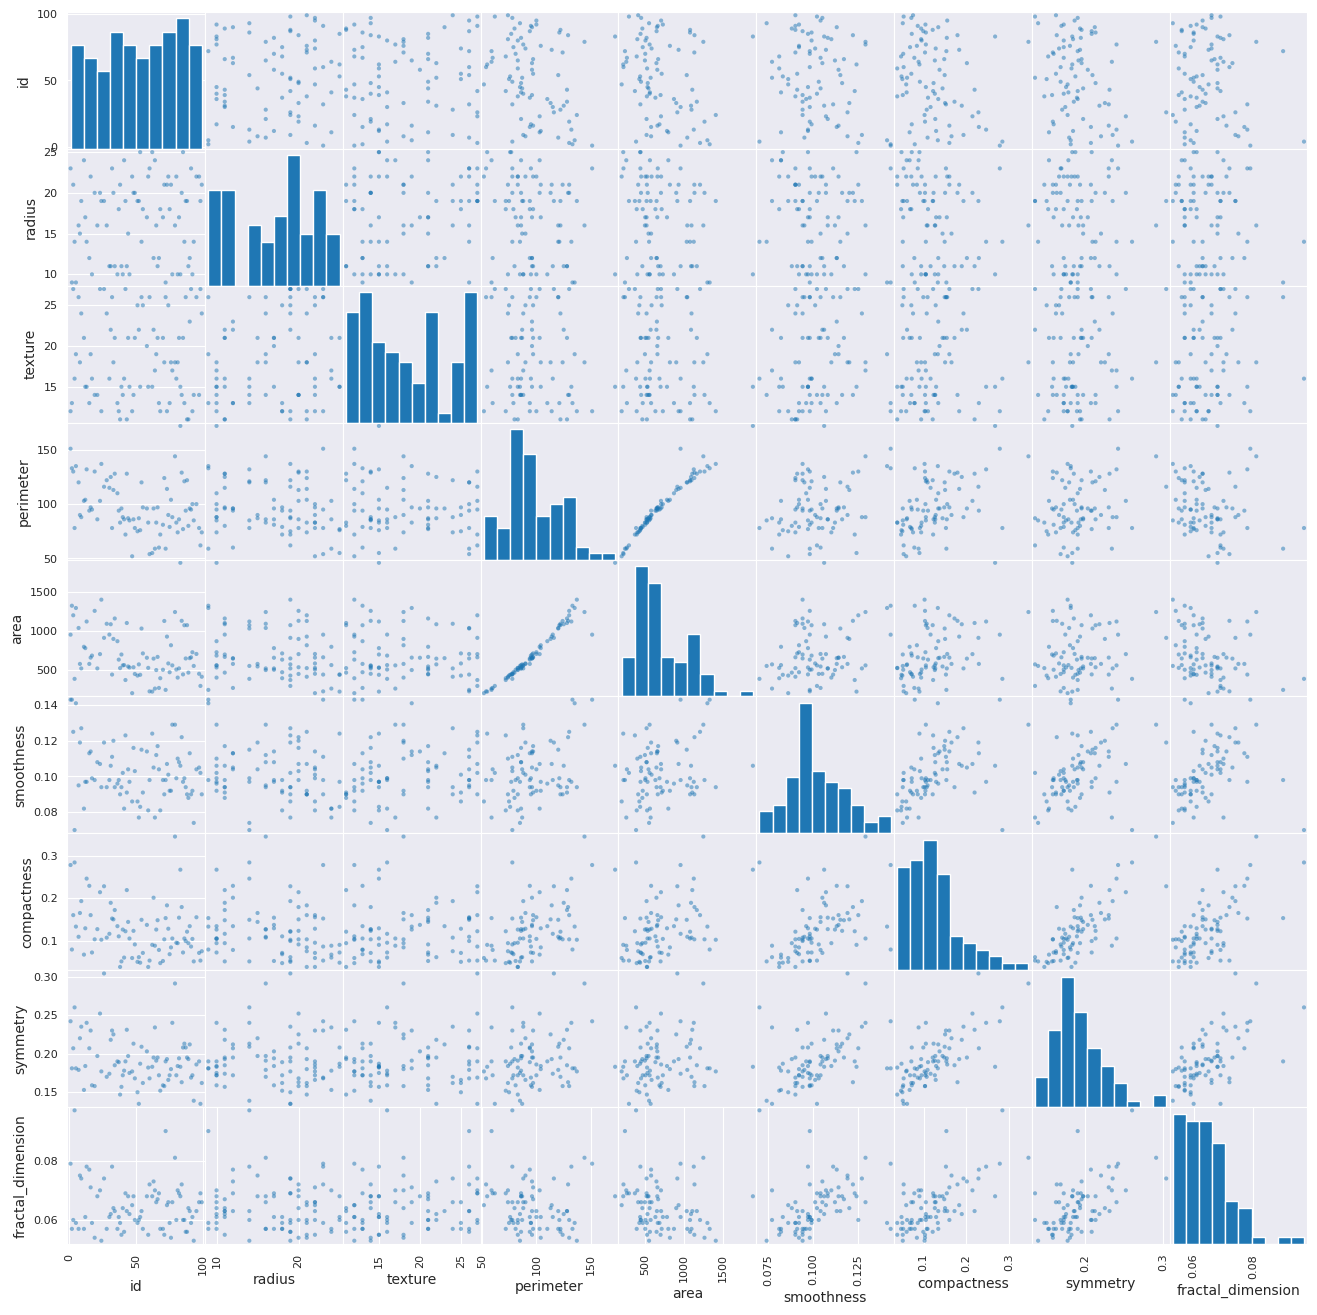

In [24]:
from pandas.plotting import scatter_matrix

scatter_matrix(x_train, figsize=(16, 16))

### Correlaction matrix

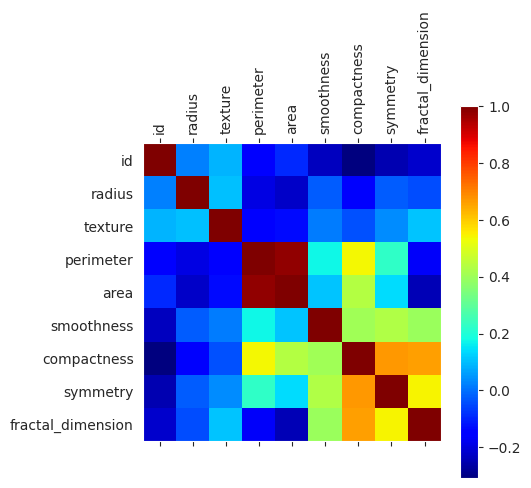

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
id,1.000000,0.023824,0.085554,-0.158420,-0.092269,-0.235095,-0.308039,-0.251821,-0.219777
radius,0.023824,1.000000,0.100987,-0.194534,-0.223198,-0.023315,-0.162551,-0.026899,-0.044712
texture,0.085554,0.100987,1.000000,-0.152566,-0.133317,0.016671,-0.040235,0.036326,0.106970
perimeter,-0.158420,-0.194534,-0.152566,1.000000,0.974472,0.176271,0.537602,0.228147,-0.166152
area,-0.092269,-0.223198,-0.133317,0.974472,1.000000,0.110705,0.435253,0.136964,-0.245465
smoothness,-0.235095,-0.023315,0.016671,0.176271,0.110705,1.000000,0.405567,0.430596,0.395176
compactness,-0.308039,-0.162551,-0.040235,0.537602,0.435253,0.405567,1.000000,0.672858,0.660499
symmetry,-0.251821,-0.026899,0.036326,0.228147,0.136964,0.430596,0.672858,1.000000,0.540386
fractal_dimension,-0.219777,-0.044712,0.106970,-0.166152,-0.245465,0.395176,0.660499,0.540386,1.000000


In [18]:
from matplotlib import pyplot as plt

names = x_train.columns
corr_mtx = (x_train).corr(method='pearson')
plt.matshow(corr_mtx, cmap="jet")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

corr_mtx

## Dropping strongly corralated data

In [27]:
x_train.drop('area', axis=1, inplace=True)
x_test.drop('area', axis=1, inplace=True)

x_train

,id,radius,texture,perimeter,smoothness,compactness,symmetry,fractal_dimension
58,59,22,15,83,0.081,0.038,0.182,0.055
69,70,17,21,81,0.098,0.052,0.159,0.057
8,9,19,24,88,0.127,0.193,0.235,0.074
52,53,25,15,76,0.083,0.048,0.187,0.061
51,52,19,22,87,0.077,0.061,0.135,0.060
...,...,...,...,...,...,...,...,...
89,90,12,23,96,0.113,0.134,0.212,0.063
36,37,18,12,94,0.098,0.110,0.189,0.061
67,68,18,12,72,0.081,0.047,0.152,0.057
15,16,22,19,97,0.114,0.160,0.230,0.071


# Model, sample_weights, optimization

## Metric function

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        30

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



{'accuracy': 1.0, 'roc_score': 1.0}

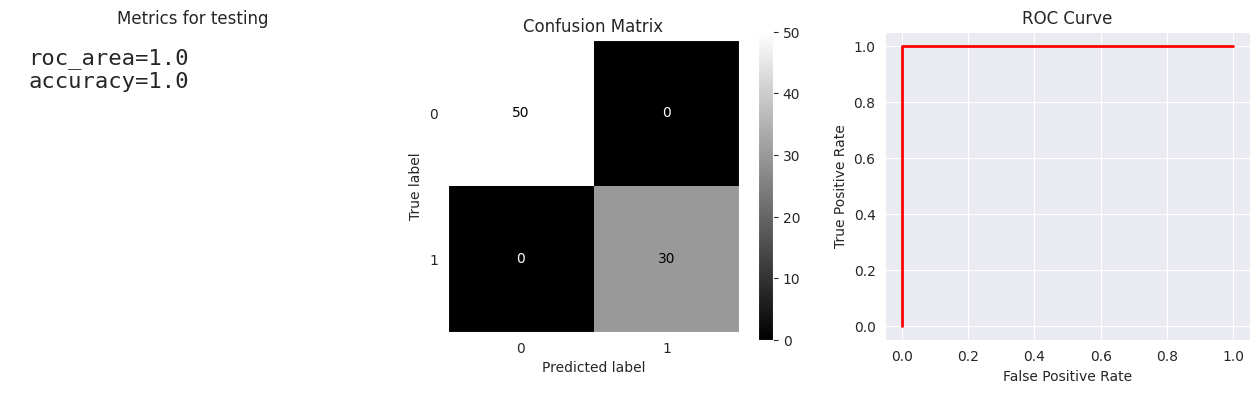

In [29]:
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, \
    roc_curve, classification_report


def metrics(preds:np.ndarray, probs:np.ndarray, lables:np.ndarray, method:str):
    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, probs)
    roc_area = roc_auc_score(lables, probs)
    accuracy = accuracy_score(lables, preds)

    print(classification_report(lables, preds))

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix.grid(False)
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}


metrics(y_train,y_train,y_train, "testing")